# Basic Single-label Multiclass Neural Network Modifications and Their Effects

### This a set of tests to see how changing a simple single-label multiclass neural network affects its accuracy and loss. The tests are based on an example in section 3.5 of Francois Chollet's book *Deep Learning with Python*

In [1]:
from keras import models, layers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


For the purpose of these tests, we will be using a dataset of Reuters newswires from 1986. We will check to see how many words in each review match a list of 10,000 words. We will then try to determine a correlation between the words used in a review and which of 46 categories the newswire belongs in. We will be assigning each newswire to only one category.

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

number_of_examples = 7
example_number = 0

example_accuracies = np.zeros(number_of_examples)

The following function will take a matrix of newswire and return a matrix that breaks down each newswire into a 10,000 element vector of ones and zeros depending on whether corresponding words were used in each review.

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
training_labels = to_categorical(train_labels)
testing_labels = to_categorical(test_labels)

To start with, let's set aside some of the training newswires to be used exclusively for testing the model on fresh data during training.

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = training_labels[:1000]
partial_y_train = training_labels[1000:]

The following function creates a basic single-label multiclass feed forward neural network and returns a dictionary with information about the training and testing of the neural network. We will use this to test how changing things around affects training time and results.

We're not going to go into too much detail about these neural networks' internal workings in this file, but one interesting thing to note is that the last layer uses a softmax activation function. This means that our output layer will be an array of probabilities that a newswire belongs in each category.

In [7]:
def make_train_and_test_model(input_epochs=9,
                              hidden_layers=2, 
                              nodes_per_layer=64):
    
    return_dict = dict()

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(nodes_per_layer, activation='relu'))
    
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return_dict['history'] = model.fit(partial_x_train, partial_y_train, epochs=input_epochs, batch_size=512, validation_data=(x_val, y_val))

    return_dict['results'] = model.evaluate(x_test, testing_labels)
    
    return return_dict

To get things running, we will start with a neural network with two hidden layers consisting of the following elements:

### Example 1
* number of epochs = 20
* number of hidden layers = 2 
* nodes per hidden layer = 64

In [8]:
returned_dict = make_train_and_test_model(input_epochs=20)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 433us/step - loss: 2.5321 - acc: 0.4957 - val_loss: 1.7223 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 2s 227us/step - loss: 1.4478 - acc: 0.6873 - val_loss: 1.3474 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 225us/step - loss: 1.0977 - acc: 0.7640 - val_loss: 1.1717 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.8713 - acc: 0.8153 - val_loss: 1.0778 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.7050 - acc: 0.8475 - val_loss: 0.9854 - val_acc: 0.7780
Epoch 6/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.5691 - acc: 0.8790 - val_loss: 0.9406 - val_acc: 0.8030
Epoch 7/20
7982/

The following function will plot training loss and validation loss after each epoch.

In [9]:
def plot_loss(input_dict):
    loss = input_dict['history'].history['loss']
    val_loss = input_dict['history'].history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.clf()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'co', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

This function will plot training accuracy and validation accuracy after each epoch.

In [10]:
def plot_accuracy(input_dict):
    acc = input_dict['history'].history['acc']
    val_acc = input_dict['history'].history['val_acc']

    epochs = range(1, len(acc) + 1)

    plt.clf()

    plt.plot(epochs, acc, 'ro', label='Training acc')
    plt.plot(epochs, val_acc, 'mo', label='Validation acc')
    plt.title('Training and validation accuracys')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

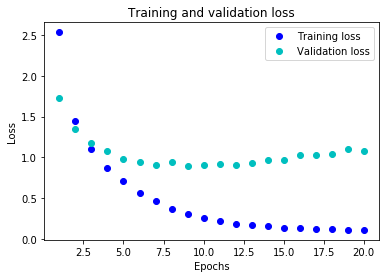

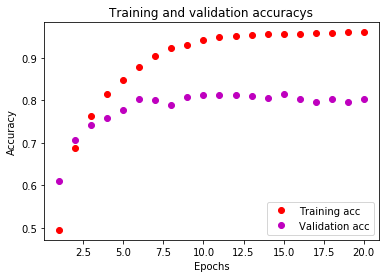

Accuracy: 0.7778272484947504
Loss: 1.212368988502482


In [11]:
plot_loss(returned_dict)
plot_accuracy(returned_dict)

print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

As we can see, validation training and validation loss do not seem to improve after nine epochs, so we'll stop training the rest of our neural networks after nine epochs. Below is what that looks like.

### Example 2
* number of epochs = 9
* number of hidden layers = 2 
* nodes per hidden layer = 64

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 420us/step - loss: 2.5391 - acc: 0.5224 - val_loss: 1.6732 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 2s 273us/step - loss: 1.3715 - acc: 0.7115 - val_loss: 1.2762 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 2s 266us/step - loss: 1.0146 - acc: 0.7791 - val_loss: 1.1313 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 2s 249us/step - loss: 0.7991 - acc: 0.8249 - val_loss: 1.0523 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 2s 238us/step - loss: 0.6406 - acc: 0.8621 - val_loss: 0.9742 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 2s 250us/step - loss: 0.5119 - acc: 0.8926 - val_loss: 0.9091 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 2s 279us/step - loss: 0.4114 - acc: 0.9151 - val_loss: 0.8926 - val_acc: 0.8200
Epoch 8

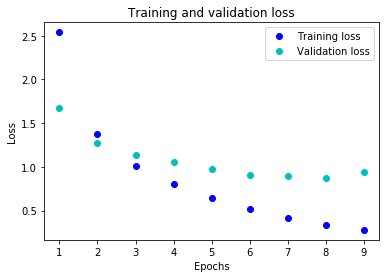

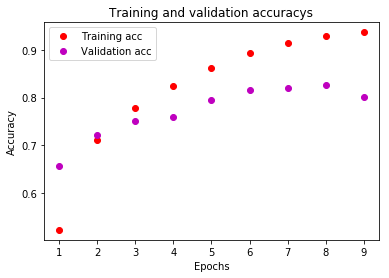

Accuracy: 0.7760463045944832
Loss: 1.0235747443918448


In [12]:
returned_dict = make_train_and_test_model()
plot_loss(returned_dict)
plot_accuracy(returned_dict)

print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

This seems like a good starting point to modify our neural network from. We used 64 nodes per hidden layer to start with. Let's see what happens when we only use four hidden nodes on one of those layers.

### Example 3
* number of epochs = 9
* number of hidden layers = 2 
* nodes per hidden layer = 4

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 520us/step - loss: 3.5512 - acc: 0.1929 - val_loss: 3.3095 - val_acc: 0.2370
Epoch 2/9
7982/7982 [==============================] - 2s 263us/step - loss: 3.1232 - acc: 0.2598 - val_loss: 2.9551 - val_acc: 0.2580
Epoch 3/9
7982/7982 [==============================] - 2s 274us/step - loss: 2.7384 - acc: 0.2791 - val_loss: 2.6205 - val_acc: 0.2830
Epoch 4/9
7982/7982 [==============================] - 2s 280us/step - loss: 2.3878 - acc: 0.3074 - val_loss: 2.3089 - val_acc: 0.3990
Epoch 5/9
7982/7982 [==============================] - 2s 274us/step - loss: 2.0415 - acc: 0.5801 - val_loss: 1.9830 - val_acc: 0.6100
Epoch 6/9
7982/7982 [==============================] - 2s 277us/step - loss: 1.7236 - acc: 0.6429 - val_loss: 1.7562 - val_acc: 0.6190
Epoch 7/9
7982/7982 [==============================] - 3s 316us/step - loss: 1.5047 - acc: 0.6553 - val_loss: 1.6186 - val_acc: 0.6260
Epoch 8

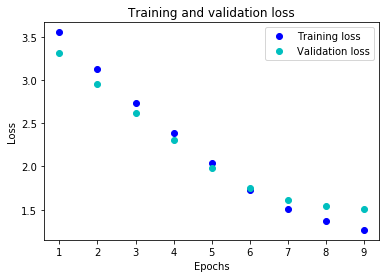

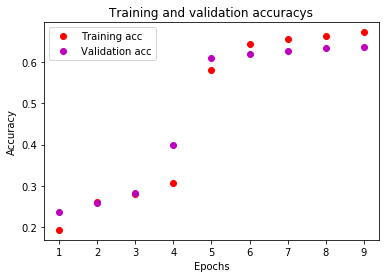

Accuracy: 0.6322350845948352
Loss: 1.566655200396068


In [13]:
returned_dict = make_train_and_test_model(nodes_per_layer=4)
plot_loss(returned_dict)
plot_accuracy(returned_dict)
print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

It is evident from our plots that reducing the nodes in one of our hidden layers from 64 to four has caused our validation accuracy to reach its optimal value sooner. However, the test accuracy of the 64 node model was 79 percent while the test accuracy from our four node model only reached 63 percent. This is because the model has a bottleneck. 10,000 input nodes are funneled down to four nodes, which then must reach 46 output nodes. Four dimensions are insufficient to effectively describe the 46 dimension outputs, even after the network manipulates the output from the four node layer The model's accuracy suffers as a result.

Let's try to meet in the middle. This next model will have a hidden layer comprised of 32 nodes. 

### Example 4
* number of epochs = 9
* number of hidden layers = 2 
* nodes per hidden layer = 32

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 4s 464us/step - loss: 2.7219 - acc: 0.5306 - val_loss: 1.8481 - val_acc: 0.6420
Epoch 2/9
7982/7982 [==============================] - 2s 272us/step - loss: 1.4977 - acc: 0.7031 - val_loss: 1.3483 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 2s 294us/step - loss: 1.0974 - acc: 0.7760 - val_loss: 1.1905 - val_acc: 0.7350
Epoch 4/9
7982/7982 [==============================] - 2s 301us/step - loss: 0.8769 - acc: 0.8188 - val_loss: 1.0590 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 2s 256us/step - loss: 0.7060 - acc: 0.8547 - val_loss: 1.0190 - val_acc: 0.8010
Epoch 6/9
7982/7982 [==============================] - 2s 262us/step - loss: 0.5740 - acc: 0.8852 - val_loss: 0.9650 - val_acc: 0.7950
Epoch 7/9
7982/7982 [==============================] - 2s 274us/step - loss: 0.4700 - acc: 0.9050 - val_loss: 0.9495 - val_acc: 0.8020
Epoch 8

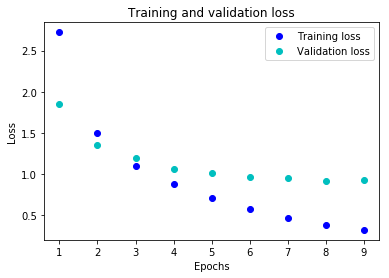

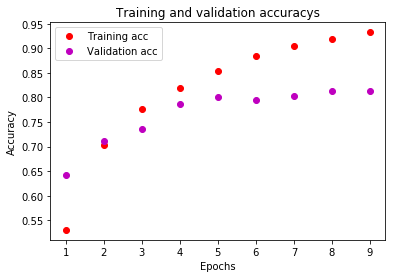

Accuracy: 0.772039180792344
Loss: 0.9995932016432126


In [14]:
returned_dict = make_train_and_test_model(nodes_per_layer=32)
plot_loss(returned_dict)
plot_accuracy(returned_dict)

print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

It did pretty well, 77 percent compared to the original 79 percent. However, a two percent drop in accuracy is still pretty bad. For this next example, we are going to double the amount of nodes in a hidden layer from our original model, from 64 nodes in a hidden layer to 128 nodes.

### Example 5
* number of epochs = 9
* number of hidden layers = 2 
* nodes per hidden layer = 128

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 428us/step - loss: 2.4090 - acc: 0.5457 - val_loss: 1.5532 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 2s 228us/step - loss: 1.2946 - acc: 0.7171 - val_loss: 1.2278 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 2s 234us/step - loss: 0.9720 - acc: 0.7833 - val_loss: 1.0803 - val_acc: 0.7570
Epoch 4/9
7982/7982 [==============================] - 2s 232us/step - loss: 0.7483 - acc: 0.8343 - val_loss: 1.0023 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 2s 237us/step - loss: 0.5853 - acc: 0.8748 - val_loss: 0.9499 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.4557 - acc: 0.9033 - val_loss: 0.9061 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 2s 239us/step - loss: 0.3627 - acc: 0.9233 - val_loss: 0.9188 - val_acc: 0.7980
Epoch 8

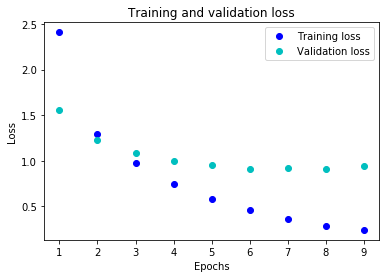

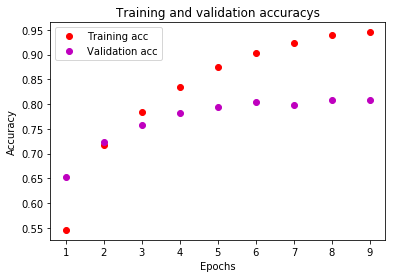

Accuracy: 0.7916295636156682
Loss: 1.0039090883063082


In [15]:
returned_dict = make_train_and_test_model(nodes_per_layer=128)
plot_loss(returned_dict)
plot_accuracy(returned_dict)

print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

Here we can see that the training for the 128 nodes model looks very similar to the training for 64 nodes nodes model. They both ended with 79 percent accuracy, but because there were more computations needed to train the 128 node layer, it took more time to train. The model is not over fit, but the excessive nodes with no improved accuracy makes this an in efficient model.

For this next model, we will only use one hidden layer. We know that it will take less time to train, but let's see if it is less accurate.

### Example 6
* number of epochs = 9
* number of hidden layers = 1 
* nodes per hidden layer = 64

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 374us/step - loss: 2.5918 - acc: 0.5754 - val_loss: 1.8121 - val_acc: 0.6630
Epoch 2/9
7982/7982 [==============================] - 2s 236us/step - loss: 1.4611 - acc: 0.7316 - val_loss: 1.3369 - val_acc: 0.7300
Epoch 3/9
7982/7982 [==============================] - 2s 227us/step - loss: 1.0624 - acc: 0.7907 - val_loss: 1.1209 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.8254 - acc: 0.8321 - val_loss: 1.0016 - val_acc: 0.8040
Epoch 5/9
7982/7982 [==============================] - 2s 242us/step - loss: 0.6622 - acc: 0.8713 - val_loss: 0.9335 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 2s 241us/step - loss: 0.5415 - acc: 0.8939 - val_loss: 0.8774 - val_acc: 0.8180
Epoch 7/9
7982/7982 [==============================] - 2s 235us/step - loss: 0.4471 - acc: 0.9117 - val_loss: 0.8486 - val_acc: 0.8200
Epoch 8

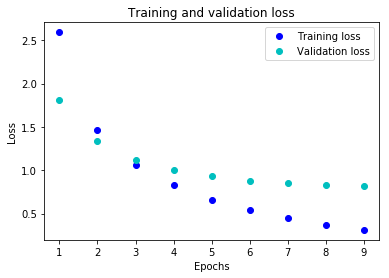

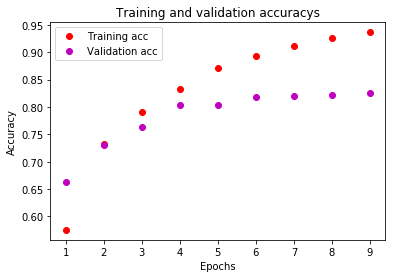

Accuracy: 0.790739091745149
Loss: 0.9217184872257848


In [16]:
returned_dict = make_train_and_test_model(hidden_layers=1)
plot_loss(returned_dict)
plot_accuracy(returned_dict)

print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

It appears that our one-hidden-layer model has the same accuracy as our original model with two hidden layers. Because we have such a simple situation, we can save time and computing power by using only one layer.

This next example will test to see if using three hidden layers improves our models accuracy.

### Example 7
* number of epochs = 9
* number of hidden layers = 3
* nodes per hidden layer = 64

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 385us/step - loss: 2.7774 - acc: 0.4599 - val_loss: 1.8041 - val_acc: 0.5990
Epoch 2/9
7982/7982 [==============================] - 2s 236us/step - loss: 1.5100 - acc: 0.6738 - val_loss: 1.4130 - val_acc: 0.6710
Epoch 3/9
7982/7982 [==============================] - 2s 251us/step - loss: 1.1410 - acc: 0.7413 - val_loss: 1.1956 - val_acc: 0.7330
Epoch 4/9
7982/7982 [==============================] - 2s 233us/step - loss: 0.9106 - acc: 0.7954 - val_loss: 1.1017 - val_acc: 0.7640
Epoch 5/9
7982/7982 [==============================] - 2s 248us/step - loss: 0.7371 - acc: 0.8364 - val_loss: 1.0103 - val_acc: 0.7850
Epoch 6/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.5848 - acc: 0.8710 - val_loss: 0.9781 - val_acc: 0.7950
Epoch 7/9
7982/7982 [==============================] - 2s 231us/step - loss: 0.4744 - acc: 0.8950 - val_loss: 0.9641 - val_acc: 0.8020
Epoch 8

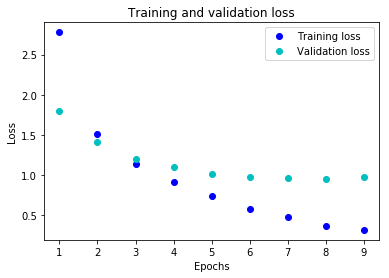

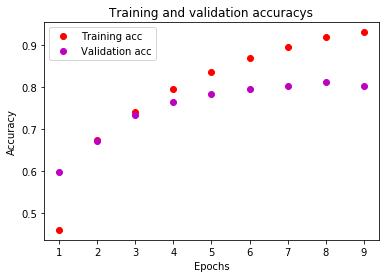

Accuracy: 0.770258236918615
Loss: 1.0749456561896171


In [17]:
returned_dict = make_train_and_test_model(hidden_layers=3)
plot_loss(returned_dict)
plot_accuracy(returned_dict)

print("Accuracy: " + str(returned_dict['results'][1]))
print("Loss: " + str(returned_dict['results'][0]))

example_accuracies[example_number] = returned_dict['results'][1]
example_number += 1

It looks like having three hidden layers resulted in some overfitting, which dropped its accuracy.

Finally, let's compare our models' testing accuracies.

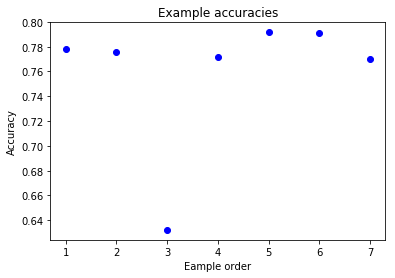

In [18]:
example_numbers = range(1, number_of_examples + 1)

plt.clf()

plt.plot(example_numbers, example_accuracies, 'bo')
plt.title('Example accuracies')
plt.xlabel('Eample order')
plt.ylabel('Accuracy')

plt.show()

We've covered the details above, but this plot emphasizes that our changes resulted in mostly minor differences in accuracies, with the exception of our bottleneck case. 

The main takeaway from this is that getting the most from our neural networks in the most efficient way can require nuance, but some things are just really wrong.